The code for an IIR filter. The filter can be used both as a High Pass and Low Pass filter. The specifications of the filter are:

Sampling rate - 40 kHz
Pass band edge frequency - 4 kHz
Stop band edge frequency - 8kHz
Pass band ripple - 0.5 dB
Minimum stop band attenuation - 40 dB

In [1]:
import numpy as np   
import matplotlib.pyplot as plt 
from scipy import signal
import math

In [2]:
fSample = 40000
fPass = 4000
fStop = 8000
fs = 0.5
wp = fPass/(fSample/2)
ws = fStop/(fSample/2)
Td = 1
gPass = 0.5
gStop = 40

In [3]:
omega_p = (2/Td)*np.tan(wp/2)
omega_s = (2/Td)*np.tan(ws/2)

N, Wn = signal.buttord(omega_p, omega_s, gPass, gStop, analog=True)
print(f'Order of the filter: {N}')
print(f'Cut-off frequency: {Wn:.3f} rad/s')

b, a = signal.butter(N, Wn, 'high', True)
z, p = signal.bilinear(b, a, fs)

w, h = signal.freqz(z, p, 512)

Order of the filter: 9
Cut-off frequency: 0.226 rad/s


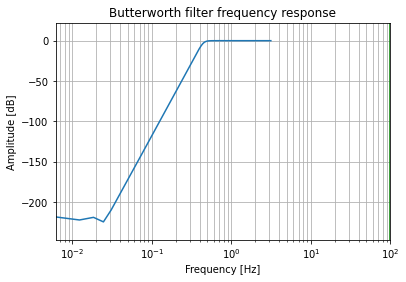

In [4]:
plt.semilogx(w, 20*np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which = 'both', axis = 'both')
plt.axvline(100, color = 'green')
plt.show()


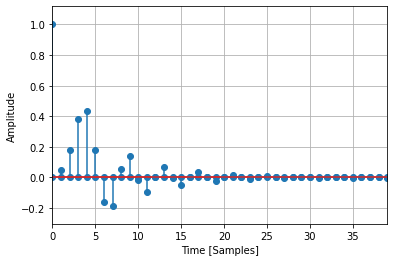

In [5]:
imp = signal.unit_impulse(40)
c, d = signal.butter(N, 0.5)
response = signal.lfilter(c, d, imp)

plt.stem(np.arange(0,40), imp, use_line_collection=True)
plt.stem(np.arange(0,40), response, use_line_collection=True)
plt.margins(0, 0.1)

plt.xlabel('Time [Samples]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

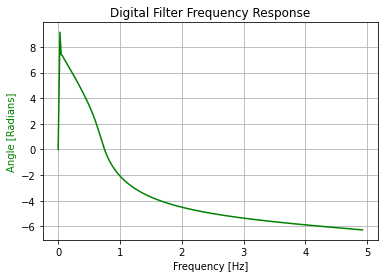

In [6]:
fig, ax = plt.subplots()

ax.set_title('Digital Filter Frequency Response')
ax.set_ylabel('Angle [Radians]', color = 'g')
ax.set_xlabel('Frequency [Hz]')

angles = np.unwrap(np.angle(h))

ax.plot(w/2*np.pi, angles, 'g')
ax.grid()
ax.axis('tight')
plt.show()